In [476]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import warnings
warnings.filterwarnings('ignore')

## Data understanding, preparation and EDA:

In [477]:
#Read the Data
pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [478]:
df.shape

(1460, 81)

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [480]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Cleaning:

In [481]:
# Remove Duplicates If Any.
df.drop_duplicates(inplace=True)

In [482]:
#Dropping the columns which has all the NULL value across the given dataset
df.dropna(how='all', axis=1,inplace=True)

In [483]:
#Find out the % of 0 or NULL values across all other columns:
def missing_zero_values_percentage(df):
    zero_val_percent = round(((100* (df == 0.00).astype(int).sum(axis=0))/len(df)),2)
    mis_val_percent = round((100 * df.isnull().sum() / len(df)),2)
    missing_value_percent_table = pd.concat([zero_val_percent,mis_val_percent], axis=1)
    missing_value_percent_table = missing_value_percent_table.rename(
        columns = {0 : '% of Zero Values', 1 : '% of NULL Values'})
    missing_value_percent_table['Total % of Missing Values'] = missing_value_percent_table['% of Zero Values'] + missing_value_percent_table['% of NULL Values']
    return missing_value_percent_table.sort_values(by='Total % of Missing Values', ascending=False)

In [484]:
missing_parcentage = missing_zero_values_percentage(df)
missing_parcentage.sort_values(by='% of Zero Values', ascending=False).head(10)

,% of Zero Values,% of NULL Values,Total % of Missing Values
PoolArea,99.52,0.00,99.52
3SsnPorch,98.36,0.00,98.36
LowQualFinSF,98.22,0.00,98.22
MiscVal,96.44,0.00,96.44
BsmtHalfBath,94.38,0.00,94.38
ScreenPorch,92.05,0.00,92.05
BsmtFinSF2,88.56,0.00,88.56
EnclosedPorch,85.75,0.00,85.75
HalfBath,62.53,0.00,62.53
MasVnrArea,58.97,0.55,59.52


In [485]:
#Removing those Columns from the dataframe which are having 0 for more 90% records 
drop_list = missing_parcentage[missing_parcentage['% of Zero Values']>90].index
print(drop_list)
df.drop(labels=drop_list, axis=1,inplace=True)
df.shape

Index(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath',
       'ScreenPorch'],
      dtype='object')


(1460, 75)

In [486]:
 #Removing Sequence Generated columns -- those columns which contains all different values for the entire dataset
drop_list=[]
for cols in df.columns:
    if (df[cols].unique().size == len(df)) & (df[cols].isna().sum()==0):
        drop_list.append(cols)
print(drop_list)
df.drop(labels=drop_list, axis=1,inplace=True)
df.shape

['Id']


(1460, 74)

#### Exploratory Data Analysis:

In [487]:
# List of Columns contains numerical values. 
# Though "MSSubClass" contains numeric value but in actual this contains categorical values so we will treat it as
# categorical column
numeric_features = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numeric_features)} numerical features:\n", numeric_features)

There are 31 numerical features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice']


In [488]:
categorical_features = list(df.select_dtypes(include='object').columns)
print(f"There are {len(categorical_features)} categorical features:\n", categorical_features)

There are 43 categorical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [489]:
# Listing the top 5 and last 5 variables which are correlated with SalePrice:
df_num = df[['LotFrontage','LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
             'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','SalePrice']]
df_cat = pd.DataFrame(categorical_features)
corr = df_num.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

BedroomAbvGr     0.168213
BsmtFinSF2      -0.011378
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


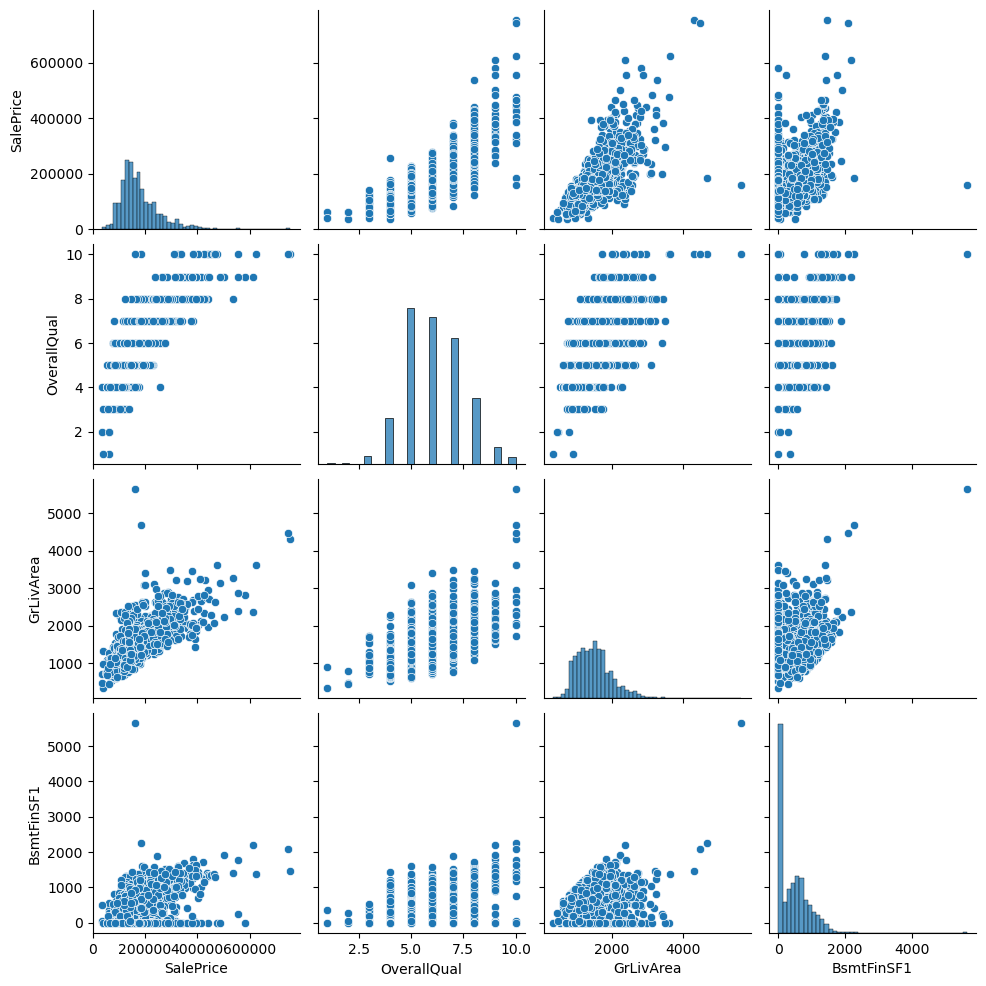

In [490]:
# Visualizing Numerical Variables
df_num = df[['SalePrice','OverallQual','GrLivArea','BsmtFinSF1','KitchenQual']]
sns.pairplot(df_num)
plt.show()

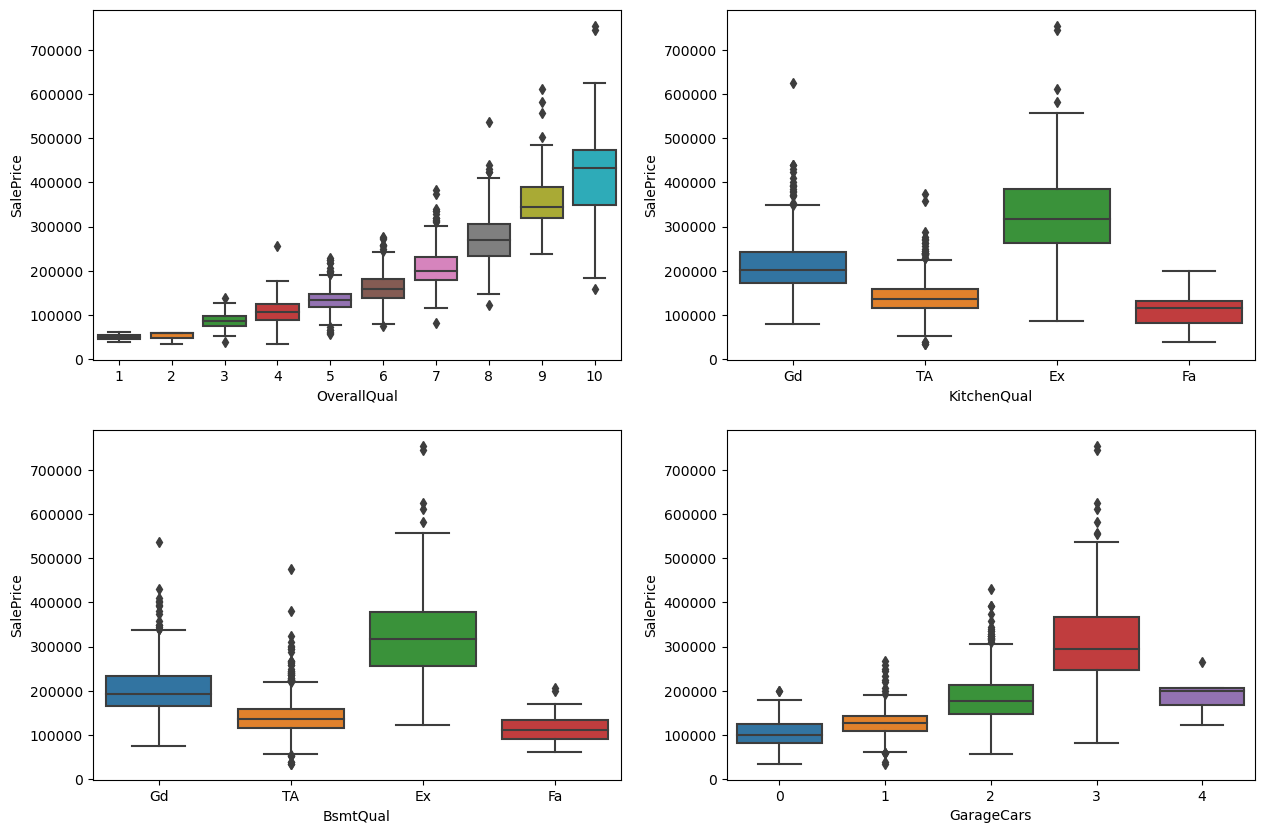

In [491]:
# Visualizing Categorical Variables
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = df)
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

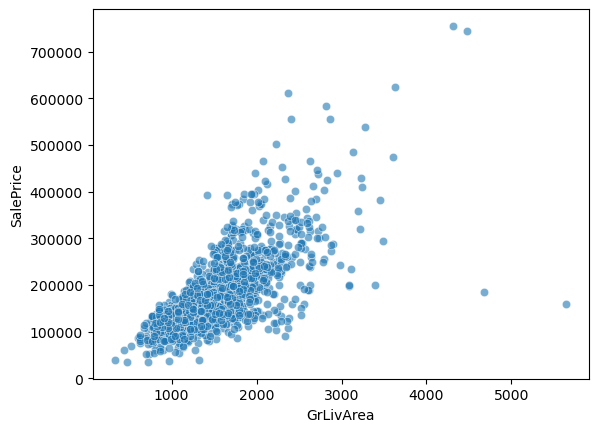

In [492]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df, alpha=0.6)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

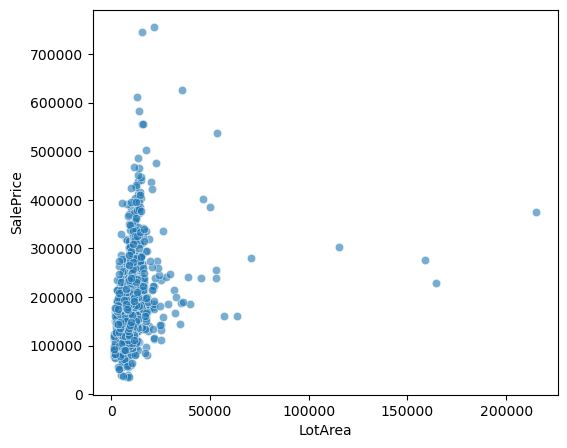

In [493]:
# LotArea and SalePrice
fig = plt.figure(figsize=(6,5))
sns.scatterplot(x='LotArea',y='SalePrice',data=df, alpha=0.6)

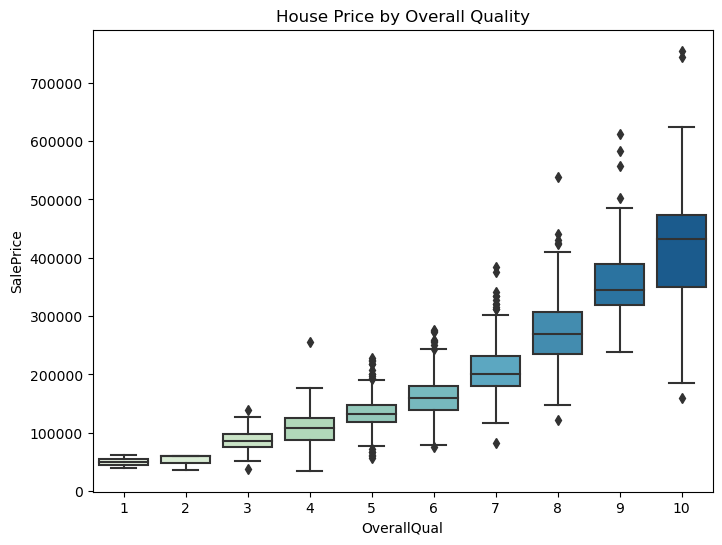

In [494]:
# higher the quality more expensive the house is .
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='GnBu')
title = plt.title('House Price by Overall Quality')

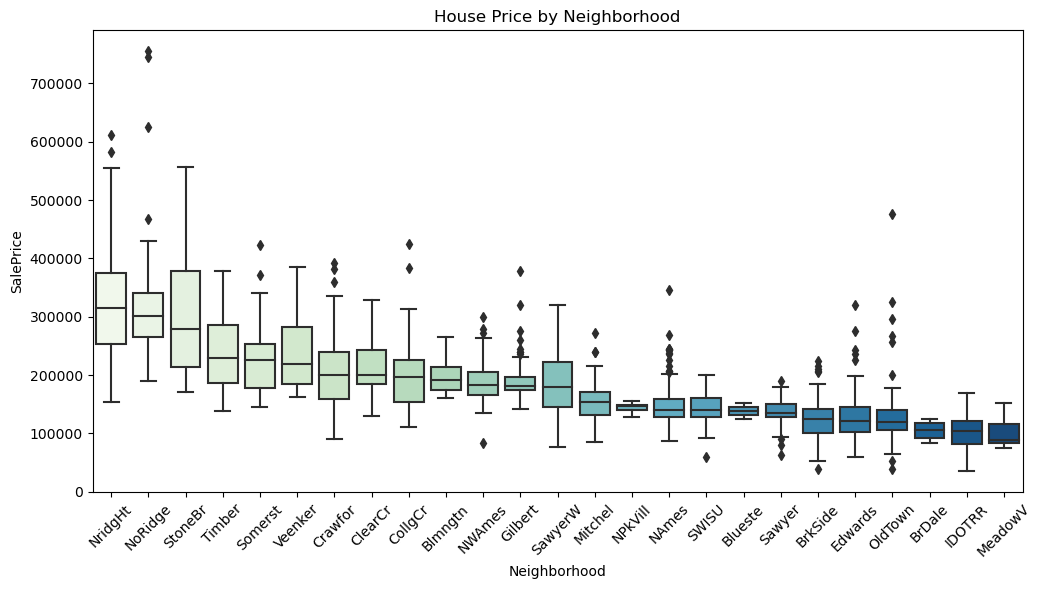

In [495]:
# There is a clear distinction in the neighborhoods where house prices are consistently high or low. 
featOrder = df.groupby(
        ['Neighborhood']).median().SalePrice.sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, palette='GnBu',order=featOrder)
title = plt.title('House Price by Neighborhood')
tick = plt.xticks(rotation=45)

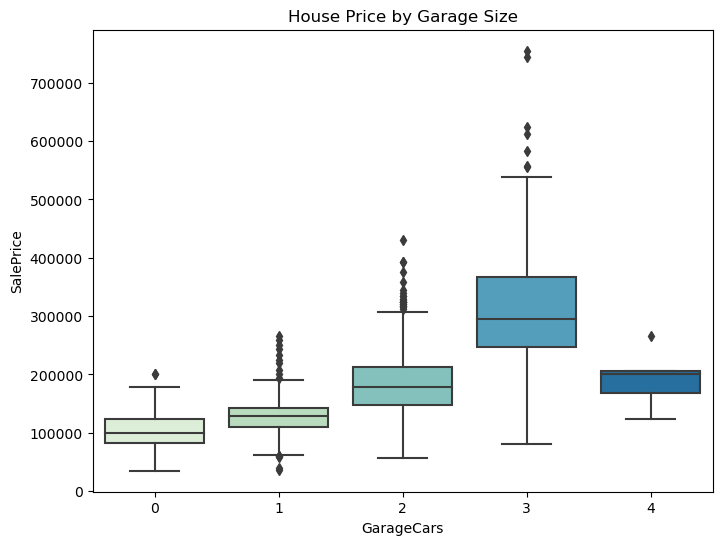

In [496]:
# House with 4 car garage is cheaper than houses with 3 car garage
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=df, palette='GnBu')
title = plt.title('House Price by Garage Size')

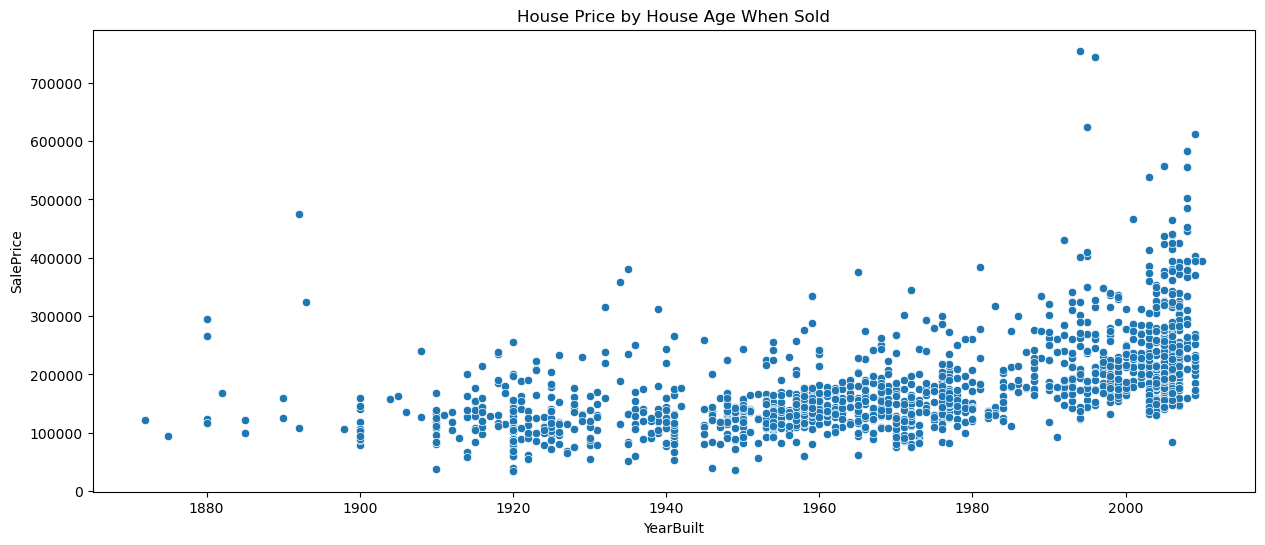

In [497]:
# Newer houses have higher Sale Price:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
title = plt.title('House Price by House Age When Sold')

### Handling Missing Values:

In [498]:
missing_parcentage.sort_values(by='% of NULL Values', ascending=False).head(20)

,% of Zero Values,% of NULL Values,Total % of Missing Values
PoolQC,0.00,99.52,99.52
MiscFeature,0.00,96.30,96.30
Alley,0.00,93.77,93.77
Fence,0.00,80.75,80.75
FireplaceQu,0.00,47.26,47.26
LotFrontage,0.00,17.74,17.74
GarageCond,0.00,5.55,5.55
GarageYrBlt,0.00,5.55,5.55
GarageFinish,0.00,5.55,5.55
GarageQual,0.00,5.55,5.55


#### There are 19 features that have missing values.
- 15 Categorical Variables where I will populate 'none' to the following columns: [PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,
BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtCond,BsmtQual,MasVnrType]
- MasVnrArea: I will set the missing values to 0
- Electrical: I will set the most frequently used value for this
- GarageYrBlt: I will set it to same as YearBuilt for the missing value
- LotFrontage: I will set it to mean values of all the available LotFrontage

In [499]:
# 15 Categorical Variables:
missing_cat_cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual','MasVnrType']
df[missing_cat_cols] = df[missing_cat_cols].fillna("none")

# MasVnrArea:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# Electrical: In the given dataset,SBrkr is used most frequently so I will chose this to replace NULL 
df['Electrical'] = df['Electrical'].fillna('SBrkr')

# GarageYrBlt:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df.YearBuilt)

# LotFrontage:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [500]:
# All the missing values are taken care:
sum(df.isnull().sum())

0

### Feature Engineering:
- Adding 1st Floor, 2nd Floor and basement area to get the total area
- Summing up all the bathrooms (in different floors) 
- Calculating Age of the House when sold
- Calculating Age of the Garage when sold
- Calculating a new indicator to find out whether the house was remodelled or not

In [501]:
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [502]:
df['TotalBathroom'] = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['HalfBath'])

In [503]:
df['HouseAgeWhenSold'] = df['YrSold'] - df['YearBuilt']
df['GarageAgeWhenSold'] = df['YrSold'] - df['GarageYrBlt']

In [504]:
df['ReModeled'] = np.where(df['YearRemodAdd'] == df['YearBuilt'], 0, 1)

In [505]:
df['TotalPorchArea'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch']

In [506]:
# Removing the Columns used in calculating new feature
drop_list = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','BsmtFullBath','HalfBath','YrSold','YearBuilt',
             'GarageYrBlt','YearRemodAdd','WoodDeckSF','OpenPorchSF','EnclosedPorch']
print(drop_list)
df.drop(labels=drop_list, axis=1,inplace=True)
df.shape

['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BsmtFullBath', 'HalfBath', 'YrSold', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']


(1460, 67)

#### Handling Categorical Variable:
- For Nominal Categorical variables, we are going to create Dummy Variables
- Those which are nominal in nature but contains numeric value, we will map them 
  to proper values before creating their corresponding dummy variables
- For Ordinal Categorical variables, we are going to rank them based on their values 
  and avoid creating dummy variables.
- We are going to Drop the categorical column if any category dominate(more than 90%) the entire list.

In [507]:
# MoSold and MSSubClass are categorical in nature but contains numeric values. So we are mapping them to 
# their appropriate value so that we can use them categorical feature.
df['MoSold'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),inplace=True)
df['MSSubClass'].replace((20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190),
                         ('1_storey_new','1_storey_old','1_storey_fnshd_attic','1.5_storey_unfnshd','1.5_storey_fnshd',
                          '2_storey_new','2_storey_old','2.5_storey','splt_mlt_lvl','splt_foyer','duplex','1_storey_pud',
                          '1.5_storey_pud','2_storey_pud','pud_mlt_lvl','2_fmly_cnvrsn'),inplace=True)

In [508]:
# Handling Ordinal Categorical variables.
# ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
df['ExterQual'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1),inplace=True)
df['ExterCond'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1),inplace=True)
df['BsmtQual'].replace(('Ex','Gd','TA','Fa','Po','none'),(5,4,3,2,1,0),inplace=True)
df['BsmtCond'].replace(('Ex','Gd','TA','Fa','Po','none'),(5,4,3,2,1,0),inplace=True)
df['BsmtExposure'].replace(('Gd','Av','Mn','No','none'),(4,3,2,1,0),inplace=True)
df['HeatingQC'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1),inplace=True)
df['KitchenQual'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1),inplace=True)
df['FireplaceQu'].replace(('Ex','Gd','TA','Fa','Po','none'),(5,4,3,2,1,0),inplace=True)
df['GarageQual'].replace(('Ex','Gd','TA','Fa','Po','none'),(5,4,3,2,1,0),inplace=True)
df['GarageCond'].replace(('Ex','Gd','TA','Fa','Po','none'),(5,4,3,2,1,0),inplace=True)

In [509]:
# Categorical column pairs [BsmtFinType1,BsmtFinType2], [Exterior1st,Exterior2nd] and [Condition1,Condition2]
# contains same values for each column in their corresponsing pair.
# This might create ambiguity while dealing with dummy variables so to get rid of that
# Let's separate their values.
df['BsmtFinType1'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA','none'),('GLQ_1','ALQ_1','BLQ_1','Rec_1','LwQ_1','Unf_1','NA_1','none_BsmtFinType1'),inplace=True)
df['BsmtFinType2'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA','none'),('GLQ_2','ALQ_2','BLQ_2','Rec_2','LwQ_2','Unf_2','NA_2','none_BsmtFinType2'),inplace=True)

df['Exterior1st'].replace(('AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'),('AsbShng_1','AsphShn_1','BrkComm_1','BrkFace_1','CBlock_1','CemntBd_1','HdBoard_1','ImStucc_1','MetalSd_1','Other_1','Plywood_1','PreCast_1','Stone_1','Stucco_1','VinylSd_1','Wd Sdng_1','WdShing_1'),inplace=True)
df['Exterior2nd'].replace(('AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'),('AsbShng_2','AsphShn_2','BrkComm_2','BrkFace_2','CBlock_2','CemntBd_2','HdBoard_2','ImStucc_2','MetalSd_2','Other_2','Plywood_2','PreCast_2','Stone_2','Stucco_2','VinylSd_2','Wd Sdng_2','WdShing_2'),inplace=True)

df['Condition1'].replace(('Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'),('Artery_1','Feedr_1','Norm_1','RRNn_1','RRAn_1','PosN_1','PosA_1','RRNe_1','RRAe_1'),inplace=True)
df['Condition2'].replace(('Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'),('Artery_2','Feedr_2','Norm_2','RRNn_2','RRAn_2','PosN_2','PosA_2','RRNe_2','RRAe_2'),inplace=True)

# Following attributes can have a 
df['Fence'].replace(('none'),('none_Fence'),inplace=True)
df['GarageType'].replace(('none'),('none_GarageType'),inplace=True)
df['GarageFinish'].replace(('none'),('none_GarageFinish'),inplace=True)
df['MasVnrType'].replace(('none'),('none_MasVnrType'),inplace=True)


In [510]:
# Checking "PoolQC" distribution:
df['PoolQC'].value_counts()

none    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [511]:
# Going to Drop PoolQC as 99.5% records does not have any Pool
df.drop(['PoolQC'],axis=1,inplace=True)

In [512]:
# Checking "Street" distribution:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [513]:
# Going to Drop Street as 99.5% records belong to one category
df.drop(['Street'],axis=1,inplace=True)

In [514]:
# Checking "Alley" distribution:
df['Alley'].value_counts()

none    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [515]:
# Going to Drop Alley as 93.7% records belong to one category
df.drop(['Alley'],axis=1,inplace=True)

In [516]:
# Checking "Utilities" distribution:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [517]:
# Going to Drop Utilities as 99.93% records belong to one category
df.drop(['Utilities'],axis=1,inplace=True)

In [518]:
# Checking "MiscFeature" distribution:
df['MiscFeature'].value_counts()

none    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [519]:
# Going to Drop MiscFeature as 97% records belong to one category
df.drop(['MiscFeature'],axis=1,inplace=True)

In [520]:
# Checking "PavedDrive" distribution:
df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [521]:
# Going to Drop PavedDrive as 92% records belong to one category
df.drop(['PavedDrive'],axis=1,inplace=True)

### Dummy Variable Creation:

In [522]:
# For "MSSubClass"
MSSubClass = pd.get_dummies(df['MSSubClass'],drop_first = True)
MSSubClass.head()

,1.5_storey_unfnshd,1_storey_fnshd_attic,1_storey_new,1_storey_old,1_storey_pud,2.5_storey,2_fmly_cnvrsn,2_storey_new,2_storey_old,2_storey_pud,duplex,pud_mlt_lvl,splt_foyer,splt_mlt_lvl
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [523]:
# For "MSZoning"
MSZoning = pd.get_dummies(df['MSZoning'],drop_first = True)
MSZoning.head()

,FV,RH,RL,RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [524]:
# For "LotShape"
LotShape = pd.get_dummies(df['LotShape'],drop_first = True)
LotShape.head()

,IR2,IR3,Reg
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [525]:
# For "LandContour"
LandContour = pd.get_dummies(df['LandContour'],drop_first = True)
LandContour.head()

,HLS,Low,Lvl
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [526]:
# For "LotConfig"
LotConfig = pd.get_dummies(df['LotConfig'],drop_first = True)
LotConfig.head()

,CulDSac,FR2,FR3,Inside
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,0
4,0,1,0,0


In [527]:
# For "LandSlope"
LandSlope = pd.get_dummies(df['LandSlope'],drop_first = True)
LandSlope.head()

,Mod,Sev
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [528]:
# For "Neighborhood"
Neighborhood = pd.get_dummies(df['Neighborhood'],drop_first = True)
Neighborhood.head()

,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [529]:
# For "Condition1"
Condition1 = pd.get_dummies(df['Condition1'],drop_first = True)
Condition1.head()

,Feedr_1,Norm_1,PosA_1,PosN_1,RRAe_1,RRAn_1,RRNe_1,RRNn_1
0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [530]:
# For "BldgType"
BldgType = pd.get_dummies(df['BldgType'],drop_first = True)
BldgType.head()

,2fmCon,Duplex,Twnhs,TwnhsE
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [531]:
# For "HouseStyle"
HouseStyle = pd.get_dummies(df['HouseStyle'],drop_first = True)
HouseStyle.head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [532]:
# For "RoofStyle"
RoofStyle = pd.get_dummies(df['RoofStyle'],drop_first = True)
RoofStyle.head()

,Gable,Gambrel,Hip,Mansard,Shed
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [533]:
# For "Exterior1st"
Exterior1st = pd.get_dummies(df['Exterior1st'],drop_first = True)
Exterior1st.head()

,AsphShn_1,BrkComm_1,BrkFace_1,CBlock_1,CemntBd_1,HdBoard_1,ImStucc_1,MetalSd_1,Plywood_1,Stone_1,Stucco_1,VinylSd_1,Wd Sdng_1,WdShing_1
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [534]:
# For "Exterior2nd"
Exterior2nd = pd.get_dummies(df['Exterior2nd'],drop_first = True)
Exterior2nd.head()

,AsphShn_2,Brk Cmn,BrkFace_2,CBlock_2,CmentBd,HdBoard_2,ImStucc_2,MetalSd_2,Other_2,Plywood_2,Stone_2,Stucco_2,VinylSd_2,Wd Sdng_2,Wd Shng
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [535]:
# For "MasVnrType"
MasVnrType = pd.get_dummies(df['MasVnrType'],drop_first = True)
MasVnrType.head()

,BrkFace,None,Stone,none_MasVnrType
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [536]:
# For "Foundation"
Foundation = pd.get_dummies(df['Foundation'],drop_first = True)
Foundation.head()

,CBlock,PConc,Slab,Stone,Wood
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0


In [537]:
# For "BsmtFinType1"
BsmtFinType1 = pd.get_dummies(df['BsmtFinType1'],drop_first = True)
BsmtFinType1.head()

,BLQ_1,GLQ_1,LwQ_1,Rec_1,Unf_1,none_BsmtFinType1
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


In [538]:
# For "BsmtFinType2"
BsmtFinType2 = pd.get_dummies(df['BsmtFinType2'],drop_first = True)
BsmtFinType2.head()

,BLQ_2,GLQ_2,LwQ_2,Rec_2,Unf_2,none_BsmtFinType2
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [539]:
# For "GarageType"
GarageType = pd.get_dummies(df['GarageType'],drop_first = True)
GarageType.head()

,Attchd,Basment,BuiltIn,CarPort,Detchd,none_GarageType
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0


In [540]:
# For "GarageFinish"
GarageFinish = pd.get_dummies(df['GarageFinish'],drop_first = True)
GarageFinish.head()

,RFn,Unf,none_GarageFinish
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [541]:
# For "Fence"
Fence = pd.get_dummies(df['Fence'],drop_first = True)
Fence.head()

,GdWo,MnPrv,MnWw,none_Fence
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [542]:
# For "SaleType"
SaleType = pd.get_dummies(df['SaleType'],drop_first = True)
SaleType.head()

,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [543]:
# For "SaleCondition"
SaleCondition = pd.get_dummies(df['SaleCondition'],drop_first = True)
SaleCondition.head()

,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,1,0


In [544]:
# Creating a new dataframe called house_df where MoSold,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope, 
# Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,
# BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,
# SaleType and SaleCondition dataframe is being added with the actual dataframe
house_df = pd.concat([df,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope, 
Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,
BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,SaleType,SaleCondition],axis = 1)
house_df.shape


(1460, 215)

In [545]:
house_df.drop(['MoSold','MSSubClass','MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical',
'Functional','GarageType','GarageFinish','Fence','SaleType','SaleCondition'],axis=1,inplace=True)
house_df.shape

(1460, 186)

#### Splitting the data into Train & Test Dataset:

In [546]:
#Spliting into train test
np.random.seed(0)
house_df_train,house_df_test = train_test_split(house_df,train_size=0.7,random_state=100)
print(house_df_train.shape)
print(house_df_test.shape)

(1021, 186)
(439, 186)


#### Rescalling house_df dataframe:

In [547]:
#Rescaling the Features
#1.Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric vars
num_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','MasVnrArea','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinSF1',
'BsmtFinSF2','BsmtUnfSF','HeatingQC','GrLivArea','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces',
'FireplaceQu','GarageCars','GarageArea','GarageQual','GarageCond','SalePrice','TotalArea','TotalBathroom','HouseAgeWhenSold','GarageAgeWhenSold','TotalPorchArea']

#2.Fit on Data:
# scaler.fit
house_df_train[num_vars] = scaler.fit_transform(house_df_train[num_vars])
house_df_train.head()


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice,TotalArea,TotalBathroom,HouseAgeWhenSold,GarageAgeWhenSold,ReModeled,TotalPorchArea,1.5_storey_unfnshd,1_storey_fnshd_attic,1_storey_new,1_storey_old,1_storey_pud,2.5_storey,2_fmly_cnvrsn,2_storey_new,2_storey_old,2_storey_pud,duplex,pud_mlt_lvl,splt_foyer,splt_mlt_lvl,FV,RH,RL,RM,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr_1,Norm_1,PosA_1,PosN_1,RRAe_1,RRAn_1,RRNe_1,RRNn_1,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn_1,BrkComm_1,BrkFace_1,CBlock_1,CemntBd_1,HdBoard_1,ImStucc_1,MetalSd_1,Plywood_1,Stone_1,Stucco_1,VinylSd_1,Wd Sdng_1,WdShing_1,AsphShn_2,Brk Cmn,BrkFace_2,CBlock_2,CmentBd,HdBoard_2,ImStucc_2,MetalSd_2,Other_2,Plywood_2,Stone_2,Stucco_2,VinylSd_2,Wd Sdng_2,Wd Shng,BrkFace,None,Stone,none_MasVnrType,CBlock,PConc,Slab,Stone,Wood,BLQ_1,GLQ_1,LwQ_1,Rec_1,Unf_1,none_BsmtFinType1,BLQ_2,GLQ_2,LwQ_2,Rec_2,Unf_2,none_BsmtFinType2,Attchd,Basment,BuiltIn,CarPort,Detchd,none_GarageType,RFn,Unf,none_GarageFinish,GdWo,MnPrv,MnWw,none_Fence,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
318,0.236301,0.039403,0.666667,0.500,0.16,0.666667,0.333333,0.8,0.75,1.00,0.174876,0.000000,0.154110,1.00,0.424289,0.500,0.0,0.666667,0.545455,0.333333,0.6,0.75,0.462623,0.6,0.6,0.312595,0.296682,0.5,0.117647,0.117647,0,0.585576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.555556,0.375,0.00,0.333333,0.333333,0.6,0.50,0.25,0.016655,0.000000,0.274401,0.50,0.201576,0.375,0.0,0.333333,0.363636,0.333333,0.8,0.25,0.155148,0.6,0.6,0.108457,0.136149,0.1,0.477941,0.448529,1,0.150700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.555556,0.875,0.00,0.333333,0.666667,0.6,0.50,0.25,0.000000,0.000000,0.207620,0.75,0.230015,0.250,0.0,0.666667,0.181818,0.000000,0.0,0.25,0.179831,0.4,0.6,0.114012,0.126904,0.0,0.705882,0.411765,1,0.424112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.333333,0.625,0.00,0.333333,0.333333,0.6,0.75,0.25,0.000000,0.000000,0.332620,0.75,0.355880,0.500,0.5,0.333333,0.727273,0.000000,0.0,0.50,0.394922,0.6,0.6,0.121650,0.212745,0.2,0.919118,0.286765,1,0.122713,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
390,0.099315,0.032409,0.444444,0.875,0.00,0.333333,0.333333,0.6,1.00,0.25,0.042700,0.265265,0.098031,1.00,0.178517,0.500,0.0,0.333333,0.363636,0.000000,0.0,0.25,0.270804,0.6,0.6,0.116789,0.136693,0.2,0.794118,0.220588,1,0.260495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [548]:
house_df_test[num_vars] = scaler.transform(house_df_test[num_vars])
house_df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice,TotalArea,TotalBathroom,HouseAgeWhenSold,GarageAgeWhenSold,ReModeled,TotalPorchArea,1.5_storey_unfnshd,1_storey_fnshd_attic,1_storey_new,1_storey_old,1_storey_pud,2.5_storey,2_fmly_cnvrsn,2_storey_new,2_storey_old,2_storey_pud,duplex,pud_mlt_lvl,splt_foyer,splt_mlt_lvl,FV,RH,RL,RM,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr_1,Norm_1,PosA_1,PosN_1,RRAe_1,RRAn_1,RRNe_1,RRNn_1,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn_1,BrkComm_1,BrkFace_1,CBlock_1,CemntBd_1,HdBoard_1,ImStucc_1,MetalSd_1,Plywood_1,Stone_1,Stucco_1,VinylSd_1,Wd Sdng_1,WdShing_1,AsphShn_2,Brk Cmn,BrkFace_2,CBlock_2,CmentBd,HdBoard_2,ImStucc_2,MetalSd_2,Other_2,Plywood_2,Stone_2,Stucco_2,VinylSd_2,Wd Sdng_2,Wd Shng,BrkFace,None,Stone,none_MasVnrType,CBlock,PConc,Slab,Stone,Wood,BLQ_1,GLQ_1,LwQ_1,Rec_1,Unf_1,none_BsmtFinType1,BLQ_2,GLQ_2,LwQ_2,Rec_2,Unf_2,none_BsmtFinType2,Attchd,Basment,BuiltIn,CarPort,Detchd,none_GarageType,RFn,Unf,none_GarageFinish,GdWo,MnPrv,MnWw,none_Fence,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1436,0.133562,0.048827,0.333333,0.571429,0.00000,0.333333,0.5,0.6,0.75,0.25,0.281536,0.0,0.128165,0.333333,0.161881,0.5,0.333333,0.333333,0.3,0.0,0.0,0.666667,0.423077,0.6,0.6,0.143963,0.294590,0.000000,0.266667,0.244444,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
57,0.232877,0.065599,0.666667,0.428571,0.00000,0.666667,0.5,0.8,0.75,0.25,0.000000,0.0,0.444444,1.000000,0.423335,0.5,0.333333,0.666667,0.5,0.0,0.0,0.666667,0.452724,0.6,0.6,0.276424,0.474641,0.428571,0.014815,0.014815,0,0.085158,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
780,0.143836,0.041693,0.666667,0.428571,0.04126,0.333333,0.5,0.8,1.00,0.25,0.000000,0.0,0.639276,0.666667,0.280696,0.5,0.333333,0.333333,0.4,0.5,0.6,0.666667,0.322115,0.6,0.6,0.240694,0.455621,0.285714,0.088889,0.088889,1,0.293187,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
382,0.198630,0.050380,0.666667,0.428571,0.00000,0.666667,0.5,0.8,0.75,0.75,0.000000,0.0,0.485271,1.000000,0.446854,0.5,0.333333,0.666667,0.6,0.0,0.0,0.666667,0.512019,0.6,0.6,0.306053,0.507608,0.428571,0.007407,0.007407,0,0.239659,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1170,0.188356,0.054407,0.555556,0.571429,0.00000,0.333333,0.5,0.6,0.75,0.75,0.238574,0.0,0.296641,0.333333,0.239462,0.5,0.333333,0.333333,0.4,0.5,0.2,0.333333,0.286859,0.6,0.6,0.231980,0.397295,0.285714,0.229630,0.229630,0,0.246959,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

## Model building and Evaluation:

In [549]:
# Creating X_train,y_train,X_test,y_test
y_train = house_df_train.pop('SalePrice')
X_train = house_df_train
y_test = house_df_test.pop('SalePrice')
X_test = house_df_test

### REF (Recursive Feature Elimination):

In [550]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [551]:
# Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=45, step=1)             
rfe = rfe.fit(X_train, y_train)

In [552]:
# List of 45 variables:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'GarageCars',
       'TotalArea', 'TotalBathroom', '1.5_storey_unfnshd', '1_storey_pud',
       '2_storey_pud', 'pud_mlt_lvl', 'IR3', 'HLS', 'Low', 'Lvl', 'Crawfor',
       'NoRidge', 'NridgHt', 'Somerst', 'StoneBr', '1.5Unf', '1Story',
       'CemntBd_1', 'ImStucc_1', 'Stone_1', 'Stucco_1', 'AsphShn_2',
       'BrkFace_2', 'CBlock_2', 'CmentBd', 'ImStucc_2', 'Stone_2',
       'none_GarageType', 'Con', 'ConLD'],
      dtype='object')

In [553]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,TotalArea,TotalBathroom,HouseAgeWhenSold,GarageAgeWhenSold,ReModeled,TotalPorchArea,1.5_storey_unfnshd,1_storey_fnshd_attic,1_storey_new,1_storey_old,1_storey_pud,2.5_storey,2_fmly_cnvrsn,2_storey_new,2_storey_old,2_storey_pud,duplex,pud_mlt_lvl,splt_foyer,splt_mlt_lvl,FV,RH,RL,RM,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr_1,Norm_1,PosA_1,PosN_1,RRAe_1,RRAn_1,RRNe_1,RRNn_1,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn_1,BrkComm_1,BrkFace_1,CBlock_1,CemntBd_1,HdBoard_1,ImStucc_1,MetalSd_1,Plywood_1,Stone_1,Stucco_1,VinylSd_1,Wd Sdng_1,WdShing_1,AsphShn_2,Brk Cmn,BrkFace_2,CBlock_2,CmentBd,HdBoard_2,ImStucc_2,MetalSd_2,Other_2,Plywood_2,Stone_2,Stucco_2,VinylSd_2,Wd Sdng_2,Wd Shng,BrkFace,None,Stone,none_MasVnrType,CBlock,PConc,Slab,Stone,Wood,BLQ_1,GLQ_1,LwQ_1,Rec_1,Unf_1,none_BsmtFinType1,BLQ_2,GLQ_2,LwQ_2,Rec_2,Unf_2,none_BsmtFinType2,Attchd,Basment,BuiltIn,CarPort,Detchd,none_GarageType,RFn,Unf,none_GarageFinish,GdWo,MnPrv,MnWw,none_Fence,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
318,0.236301,0.039403,0.666667,0.500,0.16,0.666667,0.333333,0.8,0.75,1.00,0.174876,0.000000,0.154110,1.00,0.424289,0.500,0.0,0.666667,0.545455,0.333333,0.6,0.75,0.462623,0.6,0.6,0.296682,0.5,0.117647,0.117647,0,0.585576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.555556,0.375,0.00,0.333333,0.333333,0.6,0.50,0.25,0.016655,0.000000,0.274401,0.50,0.201576,0.375,0.0,0.333333,0.363636,0.333333,0.8,0.25,0.155148,0.6,0.6,0.136149,0.1,0.477941,0.448529,1,0.150700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.555556,0.875,0.00,0.333333,0.666667,0.6,0.50,0.25,0.000000,0.000000,0.207620,0.75,0.230015,0.250,0.0,0.666667,0.181818,0.000000,0.0,0.25,0.179831,0.4,0.6,0.126904,0.0,0.705882,0.411765,1,0.424112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.333333,0.625,0.00,0.333333,0.333333,0.6,0.75,0.25,0.000000,0.000000,0.332620,0.75,0.355880,0.500,0.5,0.333333,0.727273,0.000000,0.0,0.50,0.394922,0.6,0.6,0.212745,0.2,0.919118,0.286765,1,0.122713,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
390,0.099315,0.032409,0.444444,0.875,0.00,0.333333,0.333333,0.6,1.00,0.25,0.042700,0.265265,0.098031,1.00,0.178517,0.500,0.0,0.333333,0.363636,0.000000,0.0,0.25,0.270804,0.6,0.6,0.136693,0.2,0.794118,0.220588,1,0.260495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

### Ridge Regression:

In [554]:
# Creating X_train & X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [555]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas: # for each lambda we get different model coefficients
    ridgeReg = Ridge(alpha=i)
    ridgeReg.fit(X_train_rfe, y_train)
    
    #Computing the r2 score
    y_train_pred = ridgeReg.predict(X_train_rfe)
    print("For lambda = " + str(i) +" Train r2 score = " + str(r2_score(y_train, y_train_pred))) 
    #print(ridgereg.coef_) # model coefficients

For lambda = 0 Train r2 score = 0.8580817448102704
For lambda = 0.001 Train r2 score = 0.8580805527028563
For lambda = 0.01 Train r2 score = 0.8580420543941517
For lambda = 0.1 Train r2 score = 0.8578595008056802
For lambda = 1 Train r2 score = 0.8547529798432532
For lambda = 10 Train r2 score = 0.829649039839261
For lambda = 100 Train r2 score = 0.672386559003441
For lambda = 1000 Train r2 score = 0.21210295175113725


In [556]:
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = ridgeReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred))) 

Train r2 score = 0.829649039839261


In [557]:
y_test_pred = ridgeReg.predict(X_test_rfe)
#Computing the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.8299056554640523


In [558]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",ridgeReg.coef_.transpose())

In [559]:
# GrLivArea,OverallQual,TotalBathroom,Neighborhood and TotalArea 
# are the 5 most important predictors identified by Ridge Regression 
coef_table[coef_table['Coefs']>0.02].sort_values(by='Coefs', ascending=False)

,0,Coefs
11,GrLivArea,0.117417
2,OverallQual,0.116150
16,TotalBathroom,0.078532
26,NoRidge,0.075203
15,TotalArea,0.073789
14,GarageCars,0.070428
13,KitchenQual,0.061391
5,ExterQual,0.053663
27,NridgHt,0.053521
4,MasVnrArea,0.048802


### Lasso Regression:

In [560]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas: # for each lambda we get different model coefficients
    lassoReg = Lasso(alpha=i)
    lassoReg.fit(X_train_rfe, y_train)
    
    #Computing the r2 score
    y_train_pred = lassoReg.predict(X_train_rfe)
    print("For lambda = " + str(i) +", Train r2 score = " + str(r2_score(y_train, y_train_pred))) 
    #print(ridgereg.coef_) # model coefficients

For lambda = 0, Train r2 score = 0.8580788627740099
For lambda = 0.001, Train r2 score = 0.8108746257189645
For lambda = 0.01, Train r2 score = 0.306417986205778
For lambda = 0.1, Train r2 score = 0.0
For lambda = 1, Train r2 score = 0.0
For lambda = 10, Train r2 score = 0.0
For lambda = 100, Train r2 score = 0.0
For lambda = 1000, Train r2 score = 0.0


In [561]:
lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = lassoReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.8108746257189645


In [562]:
y_test_pred = lassoReg.predict(X_test_rfe)
#Computing the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.7922263052879491


In [563]:
print(lassoReg.coef_)

[ 0.          0.          0.19157729  0.          0.          0.02684558
  0.02218095  0.04559797  0.          0.         -0.          0.23850168
 -0.          0.06270123  0.05864342  0.          0.06560213 -0.
 -0.00740007 -0.016413   -0.         -0.          0.          0.
 -0.          0.0070423   0.06429282  0.03780212  0.          0.
 -0.          0.01408347  0.         -0.          0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.          0.          0.        ]


In [564]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lassoReg.coef_.transpose())

In [565]:
# GrLivArea,OverallQual,TotalBathroom,Neighborhood and KitchenQual 
# are the 5 most important predictors identified by Lasso Regression
coef_table[coef_table['Coefs']>0].sort_values(by='Coefs', ascending=False)

,0,Coefs
11,GrLivArea,0.238502
2,OverallQual,0.191577
16,TotalBathroom,0.065602
26,NoRidge,0.064293
13,KitchenQual,0.062701
14,GarageCars,0.058643
7,BsmtExposure,0.045598
27,NridgHt,0.037802
5,ExterQual,0.026846
6,BsmtQual,0.022181


### This Section is for Subjective Questions Only:

#### Double the value of alpha:

In [566]:
# For Ridge,the optimum alpha is 10,here we are building a model with twice the optimum alpha which is 20
ridgeReg = Ridge(alpha=20)
ridgeReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = ridgeReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.8082160833288183


In [567]:
y_test_pred = ridgeReg.predict(X_test_rfe)
#Computing the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.8044298513902307


In [568]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",ridgeReg.coef_.transpose())

In [569]:
coef_table[coef_table['Coefs']>0.02].sort_values(by='Coefs', ascending=False)

,0,Coefs
2,OverallQual,0.097379
11,GrLivArea,0.087205
16,TotalBathroom,0.073132
26,NoRidge,0.068246
14,GarageCars,0.066215
13,KitchenQual,0.065788
15,TotalArea,0.059180
5,ExterQual,0.057658
27,NridgHt,0.048845
4,MasVnrArea,0.043868


In [570]:
# For Lasso,the optimum alpha is 0.001,here we are building a model with twice the optimum alpha which is 0.002
lassoReg = Lasso(alpha=0.002)
lassoReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = lassoReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.7688639626629756


In [571]:
y_test_pred = lassoReg.predict(X_test_rfe)
#Computing the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.7266008262820782


In [572]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lassoReg.coef_.transpose())

In [573]:
coef_table[coef_table['Coefs']>0].sort_values(by='Coefs', ascending=False)

,0,Coefs
2,OverallQual,0.199287
11,GrLivArea,0.133973
13,KitchenQual,0.069618
16,TotalBathroom,0.063566
14,GarageCars,0.062595
26,NoRidge,0.050125
7,BsmtExposure,0.041248
5,ExterQual,0.030090
27,NridgHt,0.025265
6,BsmtQual,0.004789


In [574]:
X_train_rfe.shape

(1021, 45)

#### Removing top 5 predicters:

In [575]:
# For Lasso,the optimum alpha is 0.001
lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = lassoReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.8108746257189645


In [576]:
y_test_pred = lassoReg.predict(X_test_rfe)
#Computing the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.7922263052879491


In [577]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lassoReg.coef_.transpose())

In [578]:
coef_table[coef_table['Coefs']>0].sort_values(by='Coefs', ascending=False)

,0,Coefs
11,GrLivArea,0.238502
2,OverallQual,0.191577
16,TotalBathroom,0.065602
26,NoRidge,0.064293
13,KitchenQual,0.062701
14,GarageCars,0.058643
7,BsmtExposure,0.045598
27,NridgHt,0.037802
5,ExterQual,0.026846
6,BsmtQual,0.022181


In [579]:
X_train_rfe.drop(['OverallQual','GrLivArea','KitchenQual','TotalBathroom','NoRidge'],axis=1,inplace=True)
X_train_rfe.shape

(1021, 40)

In [580]:
X_test_rfe.drop(['OverallQual','GrLivArea','KitchenQual','TotalBathroom','NoRidge'],axis=1,inplace=True)
X_test_rfe.shape

(439, 40)

In [581]:
# For Lasso,the optimum alpha is 0.001
lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = lassoReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.7390076680675056


In [582]:
y_test_pred = lassoReg.predict(X_test_rfe)
#Computing the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.2818303172879185


In [583]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lassoReg.coef_.transpose())

In [584]:
coef_table[coef_table['Coefs']>0].sort_values(by='Coefs', ascending=False)

,0,Coefs
12,TotalArea,0.441590
4,ExterQual,0.147643
11,GarageCars,0.114990
5,BsmtQual,0.047599
6,BsmtExposure,0.039386
3,MasVnrArea,0.037575
22,NridgHt,0.031705
21,Crawfor,0.017109
